In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets
%matplotlib inline

# Load your data
df = pd.read_csv("sales_data.csv", parse_dates=["Date"])
df["Total Sales"] = df["Quantity Sold"] * df["Unit Price"]


In [4]:
regions = ["All"] + sorted(df["Region"].unique())
products = ["All"] + sorted(df["Product"].unique())

def view_sales(region, product):
    d = df.copy()
    if region != "All":
        d = d[d["Region"] == region]
    if product != "All":
        d = d[d["Product"] == product]
    
    display(d.head(10))
    
    agg = d.groupby(["Product", "Region"])["Total Sales"].sum().unstack(fill_value=0)
    agg.plot(kind="bar", figsize=(8,5))
    plt.title(f"Sales for region={region}, product={product}")
    plt.ylabel("Total Sales (₦)")
    plt.show()

interact(
    view_sales,
    region=widgets.Dropdown(options=regions, description="Region:"),
    product=widgets.Dropdown(options=products, description="Product:")
)


interactive(children=(Dropdown(description='Region:', options=('All', 'East', 'North', 'South', 'West'), value…

<function __main__.view_sales(region, product)>

In [6]:
from ipywidgets import DatePicker, HBox

# Date pickers (optional)
start = DatePicker(description='Start', value=df['Date'].min())
end   = DatePicker(description='End',   value=df['Date'].max())

regions = ['All'] + sorted(df['Region'].unique())
products = ['All'] + sorted(df['Product'].unique())

def view_by_date(region, product, start, end):
    d = df[(df['Date'] >= start) & (df['Date'] <= end)].copy()
    if region != 'All':
        d = d[d['Region'] == region]
    if product != 'All':
        d = d[d['Product'] == product]

    display(d.head(10))

    agg = (d
           .groupby(['Product','Region'])['Total Sales']
           .sum()
           .unstack(fill_value=0))
    agg.plot(kind='bar', figsize=(8,5))
    plt.title(f"Sales for region={region}, product={product}")
    plt.ylabel("Total Sales (₦)")
    plt.show()

interact(
    view_by_date,
    region=widgets.Dropdown(options=regions, description='Region:'),
    product=widgets.Dropdown(options=products, description='Product:'),
    start=start,
    end=end
);


interactive(children=(Dropdown(description='Region:', options=('All', 'East', 'North', 'South', 'West'), value…

In [6]:
from ipywidgets import DatePicker, HBox

# Date pickers (optional)
start = DatePicker(description='Start', value=df['Date'].min())
end   = DatePicker(description='End',   value=df['Date'].max())

regions = ['All'] + sorted(df['Region'].unique())
products = ['All'] + sorted(df['Product'].unique())

def view_by_date(region, product, start, end):
    d = df[(df['Date'] >= start) & (df['Date'] <= end)].copy()
    if region != 'All':
        d = d[d['Region'] == region]
    if product != 'All':
        d = d[d['Product'] == product]

    display(d.head(10))

    agg = (d
           .groupby(['Product','Region'])['Total Sales']
           .sum()
           .unstack(fill_value=0))
    agg.plot(kind='bar', figsize=(8,5))
    plt.title(f"Sales for region={region}, product={product}")
    plt.ylabel("Total Sales (₦)")
    plt.show()

interact(
    view_by_date,
    region=widgets.Dropdown(options=regions, description='Region:'),
    product=widgets.Dropdown(options=products, description='Product:'),
    start=start,
    end=end
);


interactive(children=(Dropdown(description='Region:', options=('All', 'East', 'North', 'South', 'West'), value…

In [2]:
import pandas as pd

In [2]:
import pandas as pd


In [3]:
df = pd.read_csv("sales_data.csv", parse_dates=["Date"])

In [4]:
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           200 non-null    datetime64[ns]
 1   Region         200 non-null    object        
 2   Product        200 non-null    object        
 3   Quantity Sold  200 non-null    int64         
 4   Unit Price     200 non-null    float64       
 5   Total Sales    200 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 9.5+ KB


NameError: name 'plt' is not defined

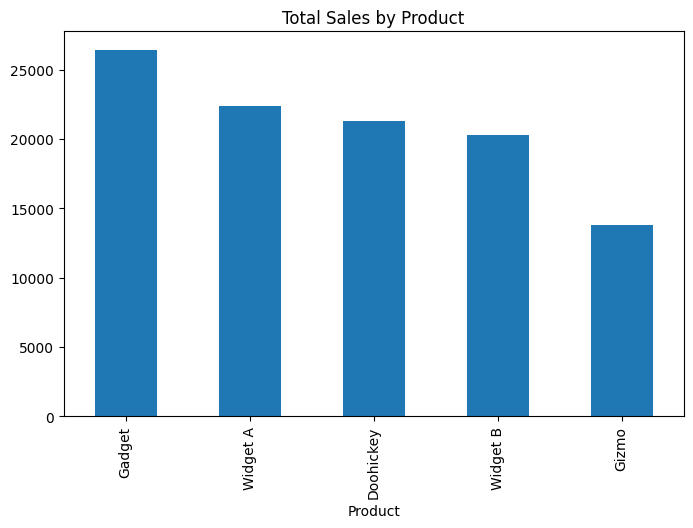

In [5]:
# Ensures the Total Sales column exists
df["Total Sales"] = df["Quantity Sold"] * df["Unit Price"]

# Group and sort
product_sales = df.groupby("Product")["Total Sales"].sum().sort_values(ascending=False)

# Plot
product_sales.plot(kind="bar", title="Total Sales by Product", figsize=(8,5))
plt.ylabel("Sales (₦)")
plt.xlabel("Product")
plt.grid(True)
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_944\2180268944.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample("M")["Total Sales"].sum()


NameError: name 'plt' is not defined

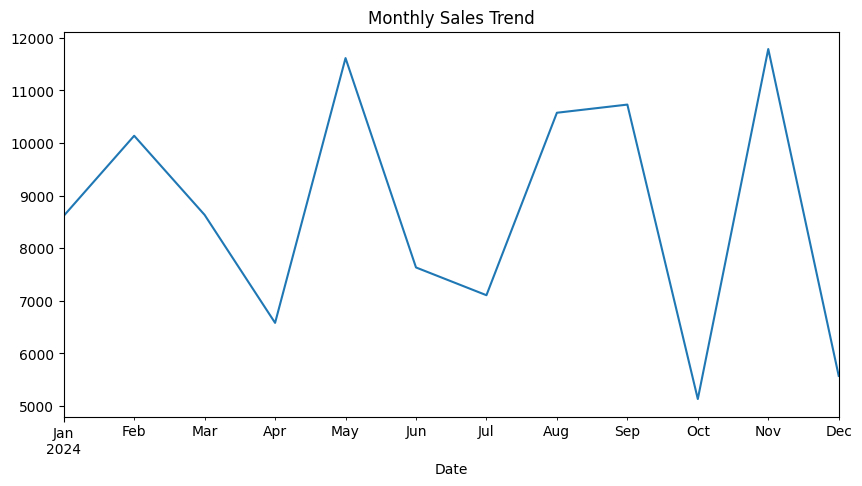

In [6]:
# Index by Date
df.set_index("Date", inplace=True)

# Resample by month
monthly_sales = df.resample("M")["Total Sales"].sum()

# Plot
monthly_sales.plot(title="Monthly Sales Trend", figsize=(10,5))
plt.ylabel("Total Sales (₦)")
plt.xlabel("Month")
plt.grid(True)
plt.show()


In [7]:
from IPython.display import display

def view_with_metrics(region, product, start, end):
    # Filter data
    d = df[(df['Date'] >= start) & (df['Date'] <= end)].copy()
    if region != 'All':
        d = d[d['Region'] == region]
    if product != 'All':
        d = d[d['Product'] == product]
    
    # Compute metrics
    total   = d['Total Sales'].sum()
    avg     = d['Total Sales'].mean()
    records = len(d)
    
    # Display metrics
    print(f"📊 Total Sales: ₦{total:,.2f}   |   Average Sale: ₦{avg:,.2f}   |   Records: {records}")
    
    # Show sample rows
    display(d.head(10))
    
    # Plot bar chart
    agg = d.groupby(['Product','Region'])['Total Sales'].sum().unstack(fill_value=0)
    agg.plot(kind='bar', figsize=(8,5))
    plt.title(f"Sales for region={region}, product={product}")
    plt.ylabel("Total Sales (₦)")
    plt.show()

interact(
    view_with_metrics,
    region=widgets.Dropdown(options=regions, description='Region:'),
    product=widgets.Dropdown(options=products, description='Product:'),
    start=start,
    end=end
);


interactive(children=(Dropdown(description='Region:', options=('All', 'East', 'North', 'South', 'West'), value…